In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker

font = {'size'   : 40}

plt.rc('font', **font)

In [2]:
names = ["NODE", "ANODE",
        "SONODE",
        "HBNODE", "GHBNODE", 
        "NesterovNODE", "GNesterovNODE"]
file_names = ["../output/walker2d/walker_NODE_rnn_9929.csv", "../output/walker2d/walker_ANODE_rnn_10019.csv",
              "../output/walker2d/walker_SONODE_rnn_11471.csv",
              "../output/walker2d/walker_HBNODE_rnn_10099.csv", "../output/walker2d/walker_GHBNODE_rnn_10099.csv",
              "../output/walker2d/walker_NesterovNODE_rnn_10098_12.csv", "../output/walker2d/walker_GNesterovNODE_rnn_10098.csv"]
df_names = {}
attr_names = ["epoch", "forward_nfe", "backward_nfe", "train_time", "loss", "ts_loss", "ts_nfe", "va_loss", "va_nfe"]
for i in range(len(names)):
        temp_df = pd.read_csv(file_names[i])
        df_names[names[i]] = temp_df[attr_names]

In [3]:
colors = [
	"mediumvioletred",
	"red",
	"deepskyblue",
	"royalblue",
	"navy",
	"green",
	"darkorange",
]
line_styles = [
	':',
	'--',
	'-.',
	'-.',
	'-.',
	'-',
	'-'
]
line_widths = [
	5,
	5,
	5,
	5,
	5,
	7,
	7
]

  x[:, None]
  x = x[:, np.newaxis]
  y = y[:, np.newaxis]


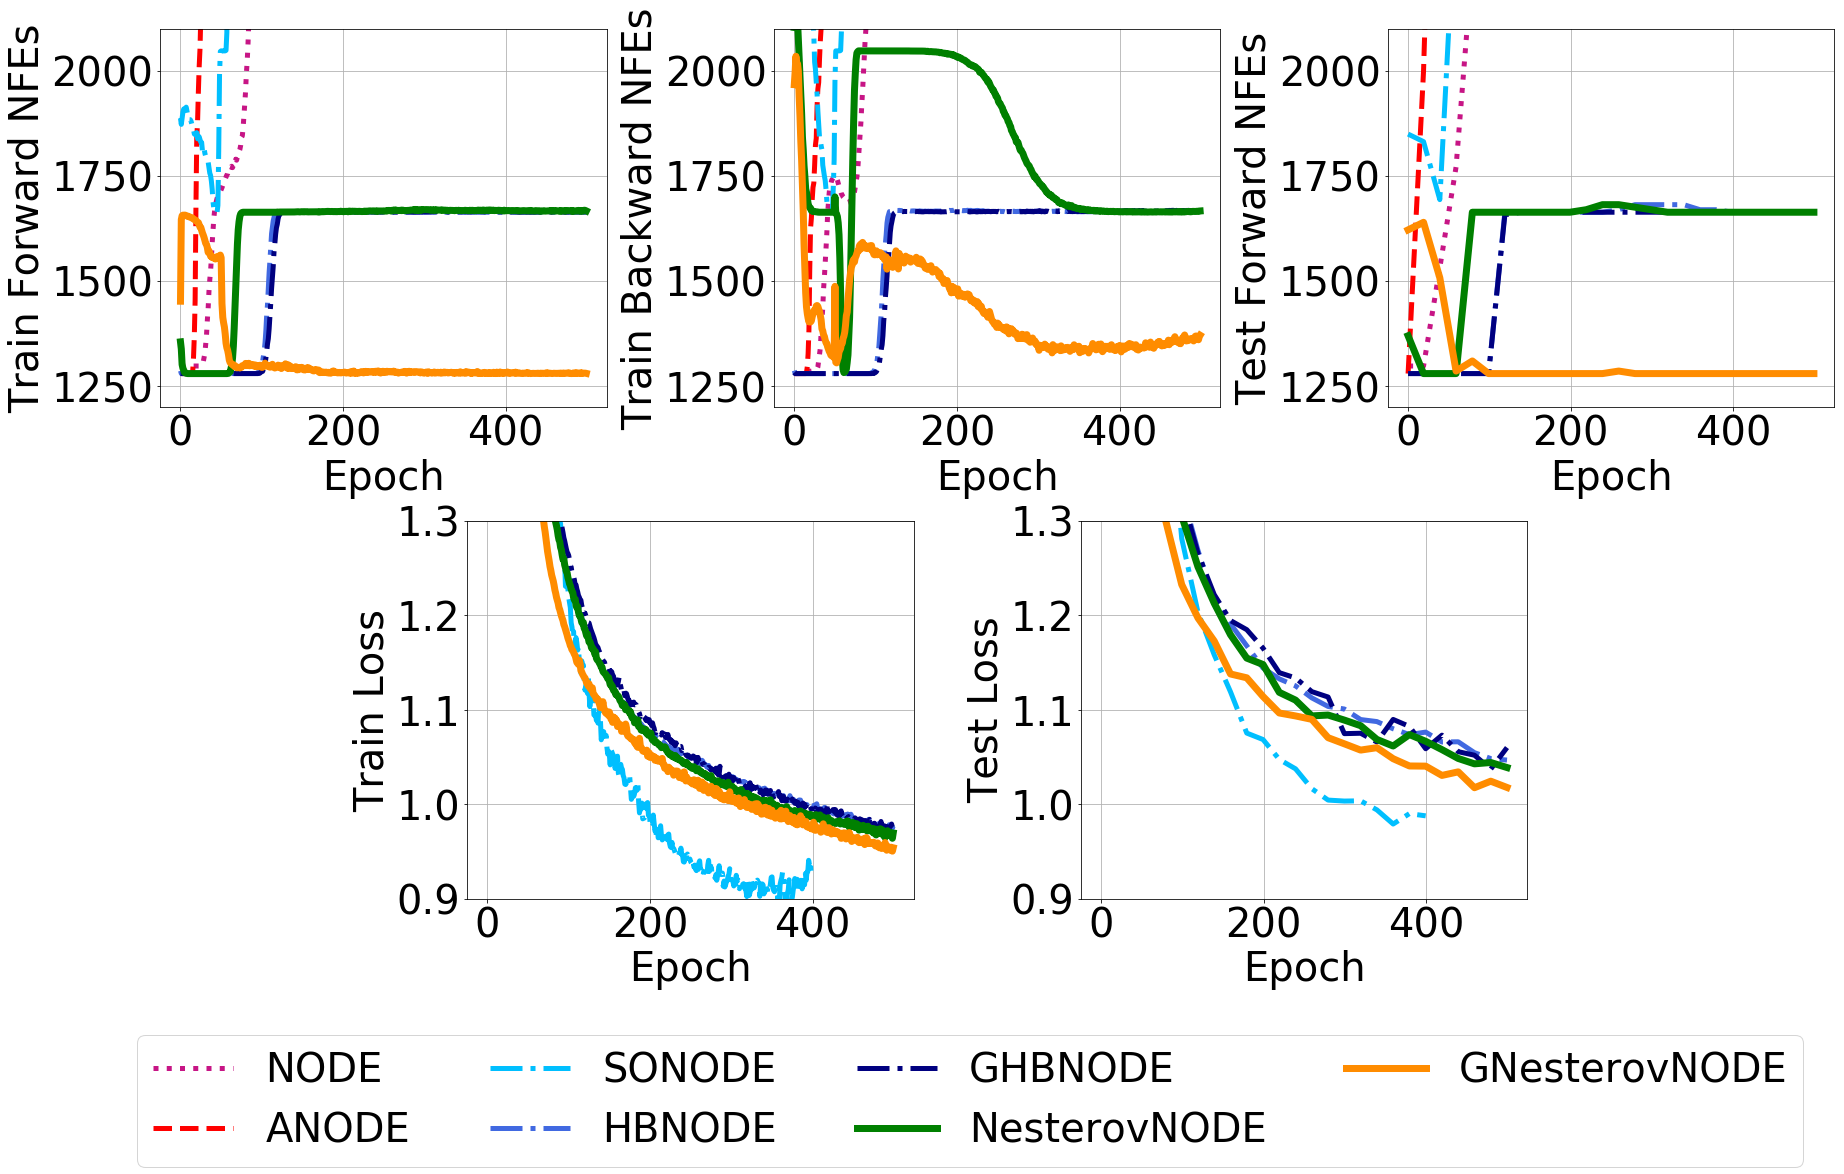

In [4]:
fig = plt.figure(figsize=(30, 16))
gs = fig.add_gridspec(2, 6, hspace=0.3, wspace=1.2)
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:])
ax4 = fig.add_subplot(gs[1, 1:3])
ax5 = fig.add_subplot(gs[1, 3:5])

axes = (ax1, ax2, ax4)
height_width_ratio = "auto"
alt_attr_names = ["Train Forward NFEs", "Train Backward NFEs", "Train Loss"]
for j, attribute in enumerate(["forward_nfe", "backward_nfe", "loss"]):
	axes[j].set_aspect(height_width_ratio)
	for i, name in enumerate(names):
		df_name = df_names[name]
		if attribute in ("ts_loss", "ts_nfe"):
			attr_arr = df_name[attribute][~np.isnan(df_name[attribute])]
			epoch_arr = df_name["epoch"][~np.isnan(df_name[attribute])]
		else:
			attr_arr = df_name[attribute]
			epoch_arr = df_name["epoch"]
		assert attr_arr.shape[0] <= 500 # max number of epochs
		axes[j].plot(epoch_arr, attr_arr, line_styles[i], linewidth=line_widths[i], color=colors[i], label=names[i])
	axes[j].set(xlabel="Epoch", ylabel=f"{alt_attr_names[j]}")
	if attribute == "forward_nfe" or attribute == "backward_nfe" or attribute == "ts_nfe":
		axes[j].set_ylim([1200, 2100])	
	if attribute == "loss" or attribute == "ts_loss":
		axes[j].set_ylim([0.9, 1.3])
	axes[j].grid()

alt_attr_names = ["Test Forward NFEs", "Test Loss"]
axes = (ax3, ax5)
for j, attribute in enumerate(["ts_nfe", "ts_loss"]):
	axes[j].set_aspect(height_width_ratio)
	for i, name in enumerate(names):
		df_name = df_names[name]
		df_name = df_names[name]
		if attribute in ("ts_loss", "ts_nfe"):
			attr_arr = df_name[attribute][~np.isnan(df_name[attribute])]
			epoch_arr = df_name["epoch"][~np.isnan(df_name[attribute])]
		else:
			attr_arr = df_name[attribute]
			epoch_arr = df_name["epoch"]
		assert attr_arr.shape[0] <= 500 # max number of epochs
		axes[j].plot(epoch_arr, attr_arr, line_styles[i], linewidth=line_widths[i], color=colors[i], label=names[i])
	axes[j].set(xlabel="Epoch", ylabel=f"{alt_attr_names[j]}")
	if attribute == "forward_nfe" or attribute == "backward_nfe" or attribute == "ts_nfe":
		axes[j].set_ylim([1200, 2100])	
	if attribute == "loss" or attribute == "ts_loss":
		axes[j].set_ylim([0.9, 1.3])
	axes[j].grid()

axbox = axes[1].get_position()
l5 = plt.legend(bbox_to_anchor=(0.5, axbox.y0-0.25), loc="lower center", 
                bbox_transform=fig.transFigure, ncol=4)
plt.savefig(f"walker2d.pdf", transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()